# Audio Recommendation Algorithm 

Within this project, we will take a look at a real dataset of songs from 1950 to 2011. 

This dataset contains a mix of lyrical and continuous variables pulled from a 2020 research paper titled Music Dataset: Lyrics and Metadata from 1950 to 2019. Review the list below to find out more about this datasets columns:

artist_name: The name of the artist

track_name: The name of the song

release_date: When this song was released

genre: The categorical genre of this song

lyrics: The pre-tokenized lyrics of this song. Disclaimer: note that as this is real-world data, lyrical content is often obscene. 

len:  The number of words in the lyrics of this song

dating: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with dating.

violence: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with violence.

world/life: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the world or life in general terms.

night/time: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do night-life or time.

shake the audience: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with provocative feeling.

family/gospel: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with family-oriented content or the gospel.

romantic: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with romantic feeling.

communication: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with communication (either in romantic terms or otherwise).

obscene: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with obscene content (money, rockstar-lifestyle, etc).

music: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with music (music about music, basically).

movement/places: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with movement or various locations.

light/visual perceptions: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the sun or other physical weather-related patterns.

family/spiritual: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the importance of family or spirituality.

sadness: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the importance of family or spirituality.

feelings: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with emotions, either positive or negative.

topic: The categorical label of lyrical content

age: A score from 0 to 1 expressing how “old” a song is from our perspective. 1 being the oldest, and 0 being the newest.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.ticker import FuncFormatter


#Importing the data 
file_path = r"data/train.csv"

df = pd.read_csv(file_path)

#Displaying the first 5 rows of data 
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28362 non-null  int64  
 1   artist_name               28362 non-null  object 
 2   track_name                28362 non-null  object 
 3   release_date              28362 non-null  int64  
 4   genre                     28362 non-null  object 
 5   lyrics                    28362 non-null  object 
 6   len                       28362 non-null  int64  
 7   dating                    28362 non-null  float64
 8   violence                  28362 non-null  float64
 9   world/life                28362 non-null  float64
 10  night/time                28362 non-null  float64
 11  shake the audience        28362 non-null  float64
 12  family/gospel             28362 non-null  float64
 13  romantic                  28362 non-null  float64
 14  commun

In [4]:
df.isnull().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
sadness                     0
feelings                    0
topic                       0
age                         0
dtype: int64

In [5]:
df.shape

(28362, 24)

In [6]:
df.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
count,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000
mean,42948.166878,1990.239652,73.030534,0.021110,0.118371,0.120984,0.057356,0.017418,0.017045,0.048676,0.076651,0.097185,0.060067,0.047417,0.049008,0.024155,0.129402,0.030995,0.425148
std,24747.811462,18.486997,41.831605,0.052366,0.178658,0.172216,0.111892,0.040658,0.041968,0.106071,0.109497,0.181314,0.123346,0.091559,0.089553,0.051032,0.181149,0.071656,0.264100
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000284,0.000289,0.014286
25%,20393.500000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,0.000993,0.000993,0.000957,0.001144,0.000993,0.185714
50%,45407.000000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,0.001645,0.001815,0.001645,0.005263,0.001754,0.414286
75%,64089.500000,2007.000000,93.000000,0.004049,0.192538,0.197854,0.065778,0.009989,0.004785,0.042304,0.132111,0.088799,0.055109,0.054373,0.064302,0.025515,0.235115,0.032617,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,0.638021,0.667782,0.618073,0.981424,0.958810,1.000000


---

## **Univariate Analysis**

In [34]:
#Value counts for Artist 

value_counts_Artist = df['artist_name'].value_counts().to_frame()

df1= value_counts_Artist.head(20)

df1

,count
artist_name,
johnny cash,190
ella fitzgerald,188
dean martin,146
willie nelson,131
george jones,107
elvis presley,97
dolly parton,96
waylon jennings,95
george strait,92


In [23]:
value_counts_Artist.describe

<bound method NDFrame.describe of                  count
artist_name           
johnny cash        190
ella fitzgerald    188
dean martin        146
willie nelson      131
george jones       107
...                ...
stigmato inc         1
plej                 1
slow train soul      1
oi va voi            1
$uicideboy$          1

[5424 rows x 1 columns]>

In [39]:
sns.barplot(data= df1, x= 'artist_name', y='genre' \
'' \
'' \
'' \
'' \
'' \
'j')
plt.show()

ValueError: Could not interpret value `genre` for `y`. An entry with this name does not appear in `data`.

In [25]:
#Lets find the value counts of genre 

value_counts_genre = df['genre'].value_counts().to_frame()

value_counts_genre

,count
genre,
pop,7038
country,5444
blues,4603
rock,4032
jazz,3844
reggae,2497
hip hop,904


([<matplotlib.patches.Wedge at 0x1741b8740>,
 [Text(-0.7732810922739707, 0.78232752241729, 'pop'),
  Text(-0.9131840534276608, -0.6132657536218922, 'country'),
  Text(0.14638699237556288, -1.090215964138866, 'blues'),
  Text(0.9752661656083537, -0.5087788382191022, 'rock'),
  Text(1.0167447252018178, 0.4197977653278784, 'jazz'),
  Text(0.504885730473267, 0.9772872654263309, 'reggae'),
  Text(0.10996325873538651, 1.0944898728303951, 'hip hop')],
 [Text(-0.42178968669489303, 0.42672410313670356, '24.8%'),
  Text(-0.49810039277872403, -0.3345085928846684, '19.2%'),
  Text(0.07984745038667065, -0.5946632531666541, '16.2%'),
  Text(0.531963363059102, -0.2775157299376921, '14.2%'),
  Text(0.5545880319282641, 0.2289805992697518, '13.6%'),
  Text(0.275392216621782, 0.5330657811416349, '8.8%'),
  Text(0.059979959310210815, 0.5969944760893063, '3.2%')])

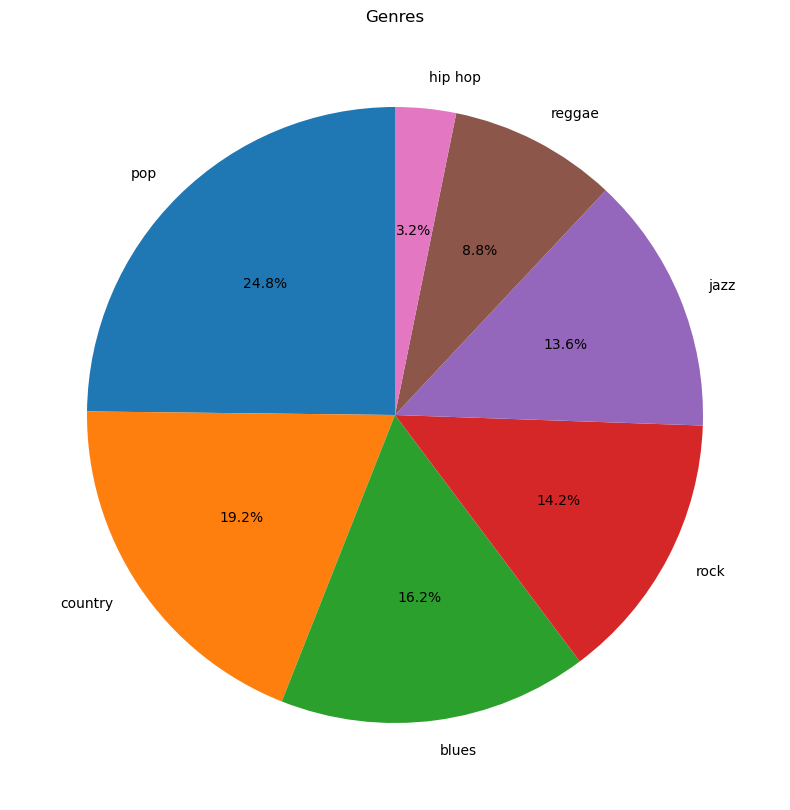

In [29]:
dataGenre = [7038, 5444, 4603, 4032, 3844, 2497, 904]
label1 = ['pop', 'country', 'blues', 'rock', 'jazz', 'reggae', 'hip hop']
plt.title("Genres")
plt.pie(dataGenre, labels= label1, autopct='%1.1f%%', startangle= 90 )